# Project Title : IPL Score Prediction

## 1. Project Overview
- This project aims to predict the total score of a cricket team at the end of their innings during an IPL (Indian Premier League) match. The model is built using historical data from IPL seasons 1 to 9 (2008-2016) and tested on data from season 10 (2017). The model uses various machine learning algorithms to predict the score based on input features such as the batting and bowling teams, overs, runs, wickets, and other match statistics.

## 2. Data Understanding

### 2.1 Data Collection

In [1]:
#import necessary modules/libraries
import numpy as np
import pandas as pd

In [3]:
#creating dataframe from the csv file
data = pd.read_csv('ipl.csv')

### 2.2 Data Exlporation

In [6]:
#examine the data
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
#study the columns
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [10]:
#check the shape
data.shape

(76014, 15)

In [12]:
#check the datatypes of each column
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [14]:
#check for null values in records
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

## 3. Data Preprocessing

### 3.1 Data Cleaning

In [16]:
#dropping unwanted columns
data = data.drop(columns=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1)

In [18]:
#inspecting the data after dropping
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [20]:
#filtering data further to keep only consistent teams
consistent_teams = [
    'Chennai Super Kings',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Rajasthan Royals',
    'Delhi Daredevils',
    'Sunrisers Hyderabad'
]
data_cleaned = data[
    (data['bat_team'].isin(consistent_teams)) & 
    (data['bowl_team'].isin(consistent_teams))
]

#keeping necessary match data only and removing early match data
data_cleaned = data_cleaned[data_cleaned['overs'] > 5]

In [22]:
#inspecting data after cleaning
data_cleaned.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [24]:
#date conversion
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

### 3.2 Feature Selection

In [27]:
import seaborn as sns

<Axes: >

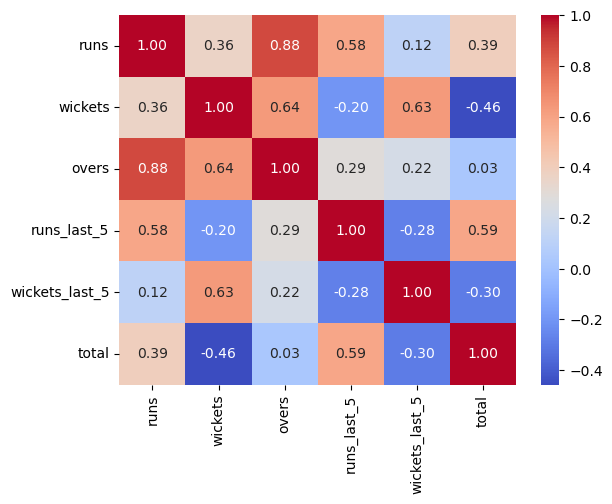

In [29]:
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

### 3.3 Encoding Categorical Features

In [32]:
#one-hot encoding using get_dummies
data_cleaned = pd.get_dummies(data_cleaned, columns=['bat_team', 'bowl_team'], drop_first=True)

In [36]:
data_cleaned.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,True,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,True,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,True,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,True,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [38]:
#converting true and false values into 1s and 0s
boolean_columns = data_cleaned.select_dtypes(include='bool').columns
data_cleaned[boolean_columns] = data_cleaned[boolean_columns].astype(int)

In [40]:
data_cleaned.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [42]:
#splitting the data into training and testing sets based on the date column
training_data = data_cleaned[data_cleaned['date'].dt.year <= 2016]
testing_data = data_cleaned[data_cleaned['date'].dt.year == 2017]

In [44]:
training_data

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,194,7,19.2,54,4,208,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68858,2016-05-29,200,7,19.3,56,4,208,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68859,2016-05-29,201,7,19.4,56,4,208,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68860,2016-05-29,202,7,19.5,57,4,208,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [46]:
testing_data

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,2017-04-05,46,1,5.1,42,1,207,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68895,2017-04-05,50,1,5.2,46,1,207,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68896,2017-04-05,50,1,5.3,44,1,207,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68897,2017-04-05,54,1,5.4,48,1,207,0,0,0,...,0,0,1,0,0,0,0,0,1,0
68898,2017-04-05,58,1,5.5,51,1,207,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## 4. Model Building

### 4.1 Models Used
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- AdaBoost Regressor (with Linear Regression as the base learner)


In [62]:
#import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### 4.2 Model Training and Evaluation

In [65]:
#splitting data
x_train = training_data.drop(['total','date'], axis=1)
y_train = training_data['total']

x_test = testing_data.drop(['total','date'], axis=1)
y_test = testing_data['total']

In [67]:
#initializing and fitting models
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

### 4.3 Model Comparison

In [69]:
#getting results
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}:\n R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}\n")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

Linear Regression:
 R²: 0.7523, MSE: 251.0124, RMSE: 15.8434

Decision Tree:
 R²: 0.5191, MSE: 487.2142, RMSE: 22.0729

Random Forest:
 R²: 0.6659, MSE: 338.4936, RMSE: 18.3982



- After evaluating the models, it was found that Linear Regression outperformed other models, with the lowest error metrics.

## 5. Model Optimization with AdaBoost

### 5.1 AdaBoost with Linear Regression

In [73]:
ada_model = AdaBoostRegressor(lr_model, random_state=42)
ada_model.fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)

In [75]:
evaluate_model("AdaBoost Regressor", y_test, ada_pred)

AdaBoost Regressor:
 R²: 0.7587, MSE: 244.4903, RMSE: 15.6362



- The AdaBoost algorithm is applied to the Linear Regression model to improve its performance. However, it did not significantly reduce the error compared to the base Linear Regression model.

### 5.2 Final Model Selection

- Linear Regression is chosen as the final model due to its simplicity and better performance compared to other models.

## 6. Predictions

### 6.1 Predicting IPL Scores

In [84]:
import pickle as pkl

pkl.dump(x_train.columns,open('x_train_columns.pkl','wb'))
pkl.dump(lr_model,open('linear_regression_model.pkl','wb'))

In [86]:
# import pickle as pkl

def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5):
    model = pkl.load(open('linear_regression_model.pkl', 'rb'))
    model_columns = pkl.load(open('x_train_columns.pkl', 'rb'))
    
    input_data = {
        'overs': overs,
        'runs': runs,
        'wickets': wickets,
        'runs_last_5': runs_last_5,
        'wickets_last_5': wickets_last_5
    }
    
    for column in model_columns:
        if column.startswith('bat_team_'):
            input_data[column] = 1 if column == f'bat_team_{batting_team}' else 0
        elif column.startswith('bowl_team_'):
            input_data[column] = 1 if column == f'bowl_team_{bowling_team}' else 0

    input_df = pd.DataFrame([input_data])

    input_df = input_df.reindex(columns=model_columns, fill_value=0)

    predicted_score = model.predict(input_df)[0]
    return round(predicted_score, 2)

In [88]:
predicted_score = predict_score(
    batting_team="Kolkata Knight Riders",
    bowling_team="Royal Challengers Bangalore",
    overs=1.1,
    runs=120,
    wickets=4,
    runs_last_5=3,
    wickets_last_5=0
)

print(f"Predicted Total Score: {predicted_score}")

Predicted Total Score: 252.46
